# Mandarin NLP Project

This project analyzes comments taken from a surveys done by Chinese factory workers. It uses a Chinese NLP package and aims to assess what the major topics of concern for workers are. There are three questions that were asked in the survey. They are in the README section of this Github repository. In this notebook, we will analyze feedback from the following question:

"What is some general feedback you would give to management?"

First we will start by importing neccessary packages and files. 

In [1]:
import pandas as pd
import os

Next, we import the dataframes files we will use and concat them. 

In [2]:
one = pd.read_csv("Data/doc1.csv")
two = pd.read_csv("Data/doc2.csv")

We are only interested in the Answer column so let's filter it out. 

In [3]:
frames = [one, two]
data = pd.concat(frames) 
data = data["Answer"]

We are also interested in filtering out certain "stop words" in Chinese or words that do not make sense to include in the context of the question. It doesn't make sense to leave feedback that says "very good" or "很好“ so we will leave words and phrases like those out.
Since the comments that do not fit the context of the question consist of short a short series of characters, let's limit the list to 4 characters and above and remove any comments with the words "very good" and "don't know" in them since
they do not fit the context of this question. 

Let's also get rid of the number that we see in the set. 

## Getting Rid of Out-of-Context Comments 

In [4]:
clean_list = (filter(lambda x : len(x) > 4 , data))

In [5]:
clean_list = pd.DataFrame(clean_list)

Let's first strip any extra whitespaces from the text. 

In [6]:
clean_list[0] = clean_list[0].str.strip()

In [7]:
import re 

cleaner_list = []

for i in clean_list[0]:
    if "好" in i:
        pass
    if "很好" in i:
        pass
    elif "没有" in i:
        pass
    elif i.isdigit():
        pass
    else:
        cleaner_list.append(i)     

Now we have removed digits and text that was out of context. 

Next, we will use LatentDirichletAllocation and TfidfVectorizer to find the most important topics. Let's change n_components to 5 so that we can see the top five topics in the data. 

## Topic Extraction 

In [8]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer().fit(cleaner_list)

data_vectorized = vectorizer.transform(cleaner_list)

lda_model = LatentDirichletAllocation(n_components=5).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)


Topic 0:
[('回头看看问题是不是根本解决了', 1.1998257649519133), ('继续为员工提供更好的意见', 1.1998257649479227), ('停车场需改进', 1.199825764943364), ('问题可以加一点', 1.1998257649374149), ('无纸张调查', 1.1998257649337905), ('更衣室生锈的更换', 1.1998257649267305), ('知乐社区不错以后多多支持', 1.1998257649127162), ('多一些提完建议后改善的示例', 1.1998257649103066), ('可不可以和员工有一次面对面的交流', 1.199825764892697), ('能否多听一些员工的心声', 0.9069804218923745)]
Topic 1:
[('女员工是不是能有生理期休息', 1.1997830380291712), ('有些题目太笼统', 1.1997830380271108), ('员工劳动强度', 1.199783038026169), ('能不能来接我们下班', 1.199783038022075), ('工人有力量', 1.1997830380118373), ('多多贴进现实', 1.1997830380113268), ('太多了太多了', 1.1997830380081802), ('停车场还需要再次改造', 1.1997830380035694), ('食堂能够多加点汤类', 1.1997830380021313), ('多看看员工怎么说', 1.1997830379999377)]
Topic 2:
[('希望一直都在', 1.1998398079574242), ('你一天的爱心可能带来别人一生的感谢', 1.1998398079566874), ('现在就可以的', 1.1998398079522103), ('员工反馈的问题得有个闭环反馈', 1.1998398079485137), ('能不能减少加班', 1.199839807947852), ('让更多的人参与', 1.1998398079475687), ('对一个问题有点反复', 1.1998398079471797), ('公司能配班车吗', 1.1998398079

Above we can see the 5 most popular topics with comments in their categories according to the LDA model. However, since this is quite a small data set of around 100 observations, 
it's only a guide that can help us find some patterns, but can't be completely relied on. To better improve this model, we would need a lot more data and to use a tokenizer and cut chinese Chinese text with an package called Jieba. This is especially the case given the structure of the Chinese language. 

After the dataframe is exported,  https://www.wordclouds.com/ can be used to create our word cloud that can be seen accessing the "chinese_cloud" png in the Images folder of this repository. 

In [9]:
new_data = pd.DataFrame(cleaner_list)
new_data.to_csv("/Users/jessicaparker/Desktop/Data/Chinese_NLP_Project/main_chinese_translations.csv")

In [10]:
import jieba

def run(data):
    seg_list = jieba.cut(str(data),cut_all=True)
    #全模式
    return " ".join(seg_list)

clean = run(cleaner_list)  
clean = clean.strip().replace("。", " ")
clean = clean.replace("，", " ").replace("\n", "")
clean = clean.replace(".", " ").replace("\n", "")

result = re.sub(r'[0-9]+', '', clean)

result

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/f6/2chfm6bx5w18b1jdzxp8ryjr0000gn/T/jieba.cache
Loading model cost 0.907 seconds.
Prefix dict has been built successfully.


"[' 知 乐 很 不错 ',   ' 贴近 第一 第一线 一线 员工   关心 一线 员工 ',   ' 希望 员工 反应 的 问题 能 有所 改变 ',   ' 把 问题 公开   透明   调查 的 什么   解决 的 什么   大家 都 不知 知道  ',   ' 知 乐 是 工人 的 心底 之 声 ',   ' 深入 员工 工作 现场   实地 了解 员工 想法 ',   ' 回头 看看 问题 是不是 不是 根本 解决 了  ',   ' 让 人数 在 多些   回 了解 到 更多 的 问题 ',   ' 积极 参加  ',   ' 不是 我们 想想 的  ',   ' 因为 任性   所以 有钱 ???',   ' 想 回家   但 确实 不怎么 怎么 安全 ',   ' 科学 的 探讨 与 研究   其 本身 就 含有 至 美   其 本身 给 人 的 愉快 就是 报酬 ； 所以 我 在 我 的 工作 里面 寻 得 了 快乐 ',   ' 关于 公司 企业 文化 认同 ',   ' 多 关心 一下 下管 管理 管理模式 模式 ',   ' 调查 了 就 得   实行 才 好 ',   ' 热情 这 东西 其实 也 很 脆弱   耗 完 了 耐心   攒 够 了 失望   剩余 的 就 只有 疲惫 和 冷漠 了 ',   ' 实事 实事求是 ！ 坚持 坚持原则 原则 ！',   ' 停车 停车场 车场 需 改进 ',   ' 调查 很 全面   细致 ',   ' 员工 反馈 的 问题 题得 得有 个 闭环 反馈  ',   ' 有些 题目 太 笼统 ',   ' 可不 可不可以 不可 可以 和 员工 有 一次 面对 面对面 对面 的 交流  ',   ' 感觉 不错   就是 问题 可以 再多 多一些 一些  ',   ' 改善 速度 点 ',   ' 照片 不 硬性 要求 就 更好 了 ',   ' 问题 太 频繁   没 时间 做 ',   ' 希望 一直 都 在 ',   ' 多 做 点 有 实际 实际意义 意义 的 事 ',   ' 多一些 一些 提 完 建议 后 改善 的 示例 ',   ' 频率 一周 周一 一次 好 点 ',   ' 提高 员工 参与 积极 积极性 极性   奖品 发放 次数 少   奖品 反应 度 不 高   可以 以定

Now we can see that the Chinese text is not only segmented by words that make up character combinations, but is also clean meaning free of any punctuation in this case. 

In a usual workflow, the next step would be to remove the Chinese stop words. However, in this case since we are dealing with a small amount of data, we will skip this step. 

In [11]:
vectorizer = TfidfVectorizer().fit([result])

data_vectorized = vectorizer.transform([result])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)

Topic 0:
[('员工', 0.8826681653258777), ('问题', 0.6874923930969272), ('解决', 0.5633060237784918), ('可以', 0.5455689734365773), ('一下', 0.5278337972642722), ('希望', 0.47464595947014265), ('工作', 0.45692591361336976), ('什么', 0.4392130991285657), ('时间', 0.4392130991285657), ('调查', 0.4392130991285657)]
Topic 1:
[('问题', 0.3336693439422264), ('解决', 0.3336671267484989), ('可以', 0.3336648795980579), ('一下', 0.3336616950578991), ('员工', 0.33365994226098716), ('希望', 0.3336432931995294), ('工作', 0.33363254104262535), ('什么', 0.33361817202614996), ('时间', 0.33361817202614996), ('调查', 0.33361817202614996)]
Topic 2:
[('问题', 0.3336691265690369), ('解决', 0.3336669108183185), ('可以', 0.33366466513026277), ('一下', 0.33366148266231543), ('员工', 0.33365973100585516), ('希望', 0.333643092773582), ('工作', 0.3336323476068486), ('什么', 0.3336179879277182), ('时间', 0.3336179879277182), ('调查', 0.3336179879277182)]


Above we can see that the topics of "problem" and "worker" are the most popular amongst the small amount of observations we have which makes sense since the question is asking for feedback. 

Next, we will use a Google API to translate all of the text at once. 

In [12]:
from googletrans import Translator

translator = Translator()

translations = []

for column in new_data.columns:
    # Unique elements of the column
    unique_elements = new_data[column].unique()
    
    for element in unique_elements:
        # Adding all the translations to a dictionary (translations)
        translations.append(translator.translate(element).text)
        
translations_df = pd.DataFrame(translations)


In [13]:
translations_df

,0
0,Zhile is very good
1,Be close to frontline employees and care about...
2,I hope that the problems that employees respon...
3,"Make the problem public and transparent, and e..."
4,Zhile is the voice of workers
...,...
103,"I hope more practical ones, such as the replac..."
104,Workers have power
105,Voice of employees
106,It is better to publicize the closed-loop situ...


## Processing English Text 

### Removing Punctuation and Tokenizing Text 

Now, let's take the translated comments, remove the punctuation, stopwords,  tokenize, amd lemmatize the text so that we have only words that can show context.

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jessicaparker/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jessicaparker/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

These are all the stopwords that we will remove from the text because they don't add to meaning. 

In [16]:
translations_df

,0
0,Zhile is very good
1,Be close to frontline employees and care about...
2,I hope that the problems that employees respon...
3,"Make the problem public and transparent, and e..."
4,Zhile is the voice of workers
...,...
103,"I hope more practical ones, such as the replac..."
104,Workers have power
105,Voice of employees
106,It is better to publicize the closed-loop situ...


First, let's remove all of the punctuation, stop words, and tokenize the text.

In [17]:
translations_df[0]=translations_df[0].str.replace('[^\w\s]','').str.lower()


In [18]:
example_sent = str(translations_df[0])
  
stop_words = set(stopwords.words('english')) 
   
filtered_sentence = [] 
  
test =  nltk.sent_tokenize(example_sent)

for w in test: 
    if w not in stop_words: 
        filtered_sentence.append(w) 
        


translations_df['tokenized_sents'] = translations_df.apply(lambda row: nltk.word_tokenize(row[0]), axis=1)


In [19]:
translations_df

,0,tokenized_sents
0,zhile is very good,"[zhile, is, very, good]"
1,be close to frontline employees and care about...,"[be, close, to, frontline, employees, and, car..."
2,i hope that the problems that employees respon...,"[i, hope, that, the, problems, that, employees..."
3,make the problem public and transparent and ev...,"[make, the, problem, public, and, transparent,..."
4,zhile is the voice of workers,"[zhile, is, the, voice, of, workers]"
...,...,...
103,i hope more practical ones such as the replace...,"[i, hope, more, practical, ones, such, as, the..."
104,workers have power,"[workers, have, power]"
105,voice of employees,"[voice, of, employees]"
106,it is better to publicize the closedloop situa...,"[it, is, better, to, publicize, the, closedloo..."


Now we can see that the text is clean and tokenized. This will make removing stop wrods and lemmatizing, or getting root words, text much easier. 

### Removing Stop Words and Lemmatizing Text 

After we remove the stop words here, we will lemmatize the text. This will give us root words my turning words like 'employees' into 'employee'

In [20]:
translations_df['tokenized_sents'] = translations_df['tokenized_sents'].apply(lambda x: [item for item in x if item not in stop_words])

In [21]:
from nltk.stem import WordNetLemmatizer 

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(w) for w in text])

# df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
translations_df['text_lemmatized'] = translations_df['tokenized_sents'].apply(lemmatize_text)



translations_df

,0,tokenized_sents,text_lemmatized
0,zhile is very good,"[zhile, good]",zhile good
1,be close to frontline employees and care about...,"[close, frontline, employees, care, frontline,...",close frontline employee care frontline employee
2,i hope that the problems that employees respon...,"[hope, problems, employees, respond, changed]",hope problem employee respond changed
3,make the problem public and transparent and ev...,"[make, problem, public, transparent, everyone,...",make problem public transparent everyone know ...
4,zhile is the voice of workers,"[zhile, voice, workers]",zhile voice worker
...,...,...,...
103,i hope more practical ones such as the replace...,"[hope, practical, ones, replacement, rusty, wa...",hope practical one replacement rusty wardrobe ...
104,workers have power,"[workers, power]",worker power
105,voice of employees,"[voice, employees]",voice employee
106,it is better to publicize the closedloop situa...,"[better, publicize, closedloop, situation, pro...",better publicize closedloop situation problem


Here we can see the difference in all the columns that have been taken in each step. The last column "text_lemmatized" features the cleanest text, so we will use this for the wordcloud.

Now, let's see if we can extract any topics from the English text. Since words in Chinese have no spcaes between them, the results will be a bit different. 

In [22]:

vectorizer = TfidfVectorizer().fit(translations_df['text_lemmatized'])

data_vectorized = vectorizer.transform(translations_df['text_lemmatized'])

lda_model = LatentDirichletAllocation(n_components=3).fit(data_vectorized)

def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(lda_model, vectorizer)


Topic 0:
[('lot', 2.393808426403368), ('parking', 2.393808426403119), ('much', 1.6561562523189537), ('food', 1.64528716313546), ('time', 1.5844492608303595), ('place', 1.450865978723207), ('labor', 1.3808818310861124), ('ok', 1.3416520696472767), ('need', 1.3322517940505259), ('investigating', 1.3283660753143212)]
Topic 1:
[('problem', 2.9926260061914487), ('feedback', 2.1120226723893034), ('add', 1.5315158344674402), ('practical', 1.397211828346757), ('salary', 1.3541241124791878), ('thought', 1.3286609979722672), ('deal', 1.2900409060474782), ('people', 1.271331164304632), ('company', 1.2611018172678083), ('resolved', 1.2342034865339815)]
Topic 2:
[('employee', 6.740795534053962), ('hope', 3.4419600720690156), ('zhile', 2.379649273173432), ('attention', 2.351772824044624), ('pay', 2.3517721639551583), ('good', 2.3265622784640043), ('voice', 2.1725449027922474), ('better', 1.8190912277451305), ('problem', 1.7338328727860277), ('get', 1.6901108563716873)]


We can see the major topics. This is inline to the insights gain from the original Mandarin text. However, again this is simply a guide and would need much more data to gain greater accuracy.  

Next, we will create a work cloud the features the sizes of the words according to their frequency. 

In [23]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

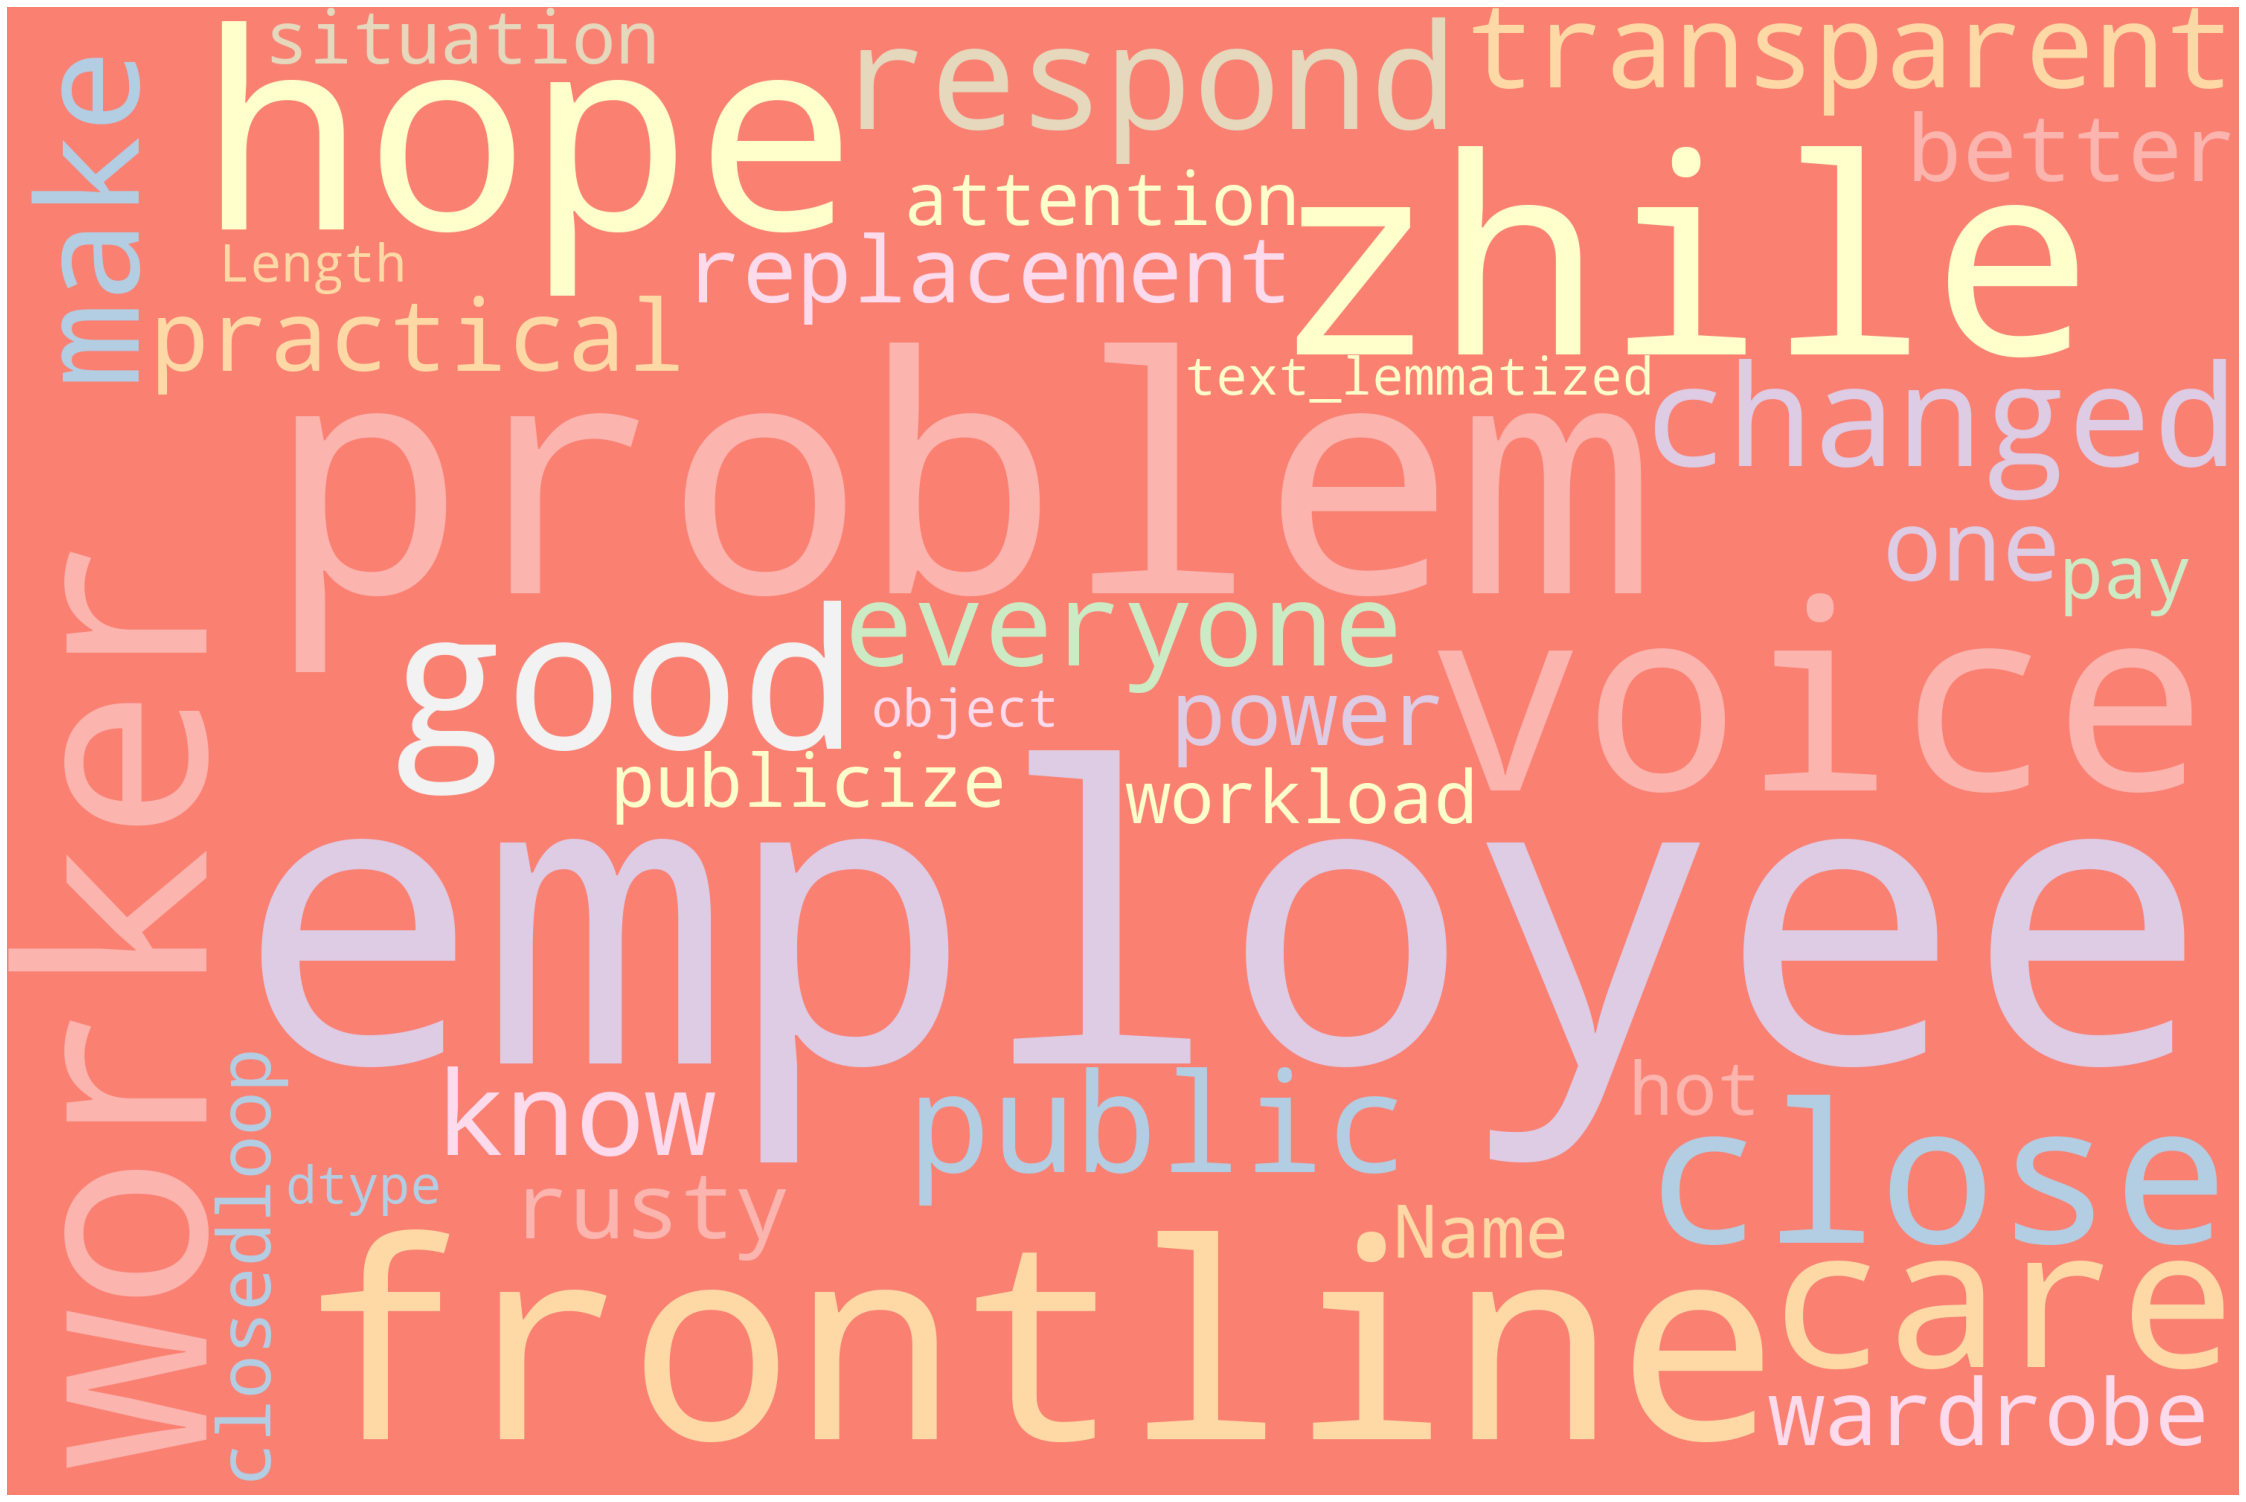

In [24]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000,  max_words=600, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False).generate(str(translations_df['text_lemmatized']))
# Plot
                                                                                                                                               
plot_cloud(wordcloud)